In [1]:
# step 1: build 
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

doge_df = pd.read_csv('doge-2021.csv')
metrics = doge_df.columns[1:5]


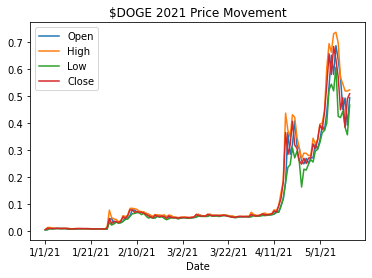

In [2]:
# lets graph this year's doge data over time

fig, ax = plt.subplots()
title = '$DOGE 2021 Price Movement'
for metric in metrics:
    ax = doge_df.plot(ax=ax, kind='line', x='Date', y=metric, legend='True', title=title)


In [3]:
# build dataset -- query tweets about DOGE from this year

# !pip install tweepy
import tweepy
import re

consumer_key = 'dB3HhR7wYYGvRv96vr2D7nkVP'
consumer_secret = 'bnZwA5qDzb5S2ryb3z1Kc7HPQhooO3TVhDqp6KjacM8v98LygP'

access_token = '3395702405-imuAgWIHc5hTzHhJg4q3u19TibCK29ucR1mwD1q'
access_token_secret = 'UcCtMNRGhmLlmJFz6lWlaVeshaGClx0cmDBYJE8UdDMsB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

doge_query = api.search_full_archive(environment_name='dev', query='DOGE', fromDate='202101010000', maxResults=100)

for tweet in doge_query:
    print(tweet.text)

RT @TopLoaderSports: #Dogecoin community isn’t toxic, crypto isn’t toxic. We can all choose to do good. Don’t waste that opportunity! 

#DO…
BitKan Upgrades Strategic Partnership with 
Atokadditional of OXEx Futures

Don miss out the promotion below: 

Pro… https://t.co/Pg26kUsM7X
RT @flurbnb: $60 to one person in 9 hours

Retweet &amp; follow @compactcrypto &amp; upvote post https://t.co/4BUiH6nhXf

#COMPACT $CPAC #giveaway…
RT @nitish_jakhar: Who believes #Dogecoin is going to hit more than $10?

ME              ME            ME
👇               👇              👇…
RT @AryaStarkWar: Everyone! Go get your $Pussy... This is gonna be huge! Don't get outside!
@pussyfinancial  #doge #meme #killer #wars #pus…
RT @bycoinhunter: 🔥5.000.000 ADET $SHIBX ÇEKİLİŞİ🔥

Katılmak için:👇
1⃣ @shibavax takip et,
2⃣ Bu gönderiyi RT yap,
3⃣ Yoruma en sevdiğin me…
Relatives - Beta Aage Ka kya soche ho ?

Me - App par depend krta hai 10 rupee doge toh chips or 50 rupee doge toh cold drink
RT @Vito_hokk_leone: 

In [4]:
# sentiment analysis 

# iterate through tweets, for each tweet give it a sentiment (negative or positive).
# if its hard to determine, just skip the tweet

def set_senti():
    d = {}
    
    pos = open("goods.txt","r")
    while True:
        word = pos.readline()
        if not word:
            break
        else:
            d[word.rstrip()] = 1
    pos.close()

    neg = open("bads.txt","r")
    while True:
        word = neg.readline()
        if not word:
            break
        else:
            d[word.rstrip()] = -1
    neg.close()
    
    return d

senti_array = set_senti()

def compute_senti(tweet):
    score = 0
    tweet = tweet.text
    
    for word in tweet.split(" "):
        word.lower()
        if re.match("#",word):
            word = word[1:]
            
        if re.search("[\.|!|,]$",word):
            word = word[:-1]

        if (word in senti_array):
            score += senti_array[word]
            
    if score != 0:
        return int(abs(score)/score)
    else:
        return 0


def compute_infl(tweet):
    # influence ranges from 0 - infinity
    return 1

# build an array that maps tweets to sentiments
tweets = []

for tweet in doge_query:
    sentiment = compute_senti(tweet)    # either -1 (negative) or 1 (positive)
    influence = compute_infl(tweet)

    w_sentiment = sentiment * influence 
    
# iterate through days, for each day compute the sum of w_sentiments (if its negative, more people had negative things to say, if its positive, people had good things to say)

# this is just a skeleton, day and days are both undefined rn
# for day in days:
  #  daily_sentiment = sum(w_sentiment) 

# plot daily sentiment over time, compare it to doge data
